#  Arima (ARIMA)

## Importing Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Importing and Processing Data

In [2]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-west-2a.csv')
df

,Unnamed: 0,Time,Price
0,0,2021-03-29,0.157533
1,1,2021-03-30,0.158067
2,2,2021-03-31,0.158300
3,3,2021-04-01,0.158625
4,4,2021-04-02,0.159125
...,...,...,...
86,86,2021-06-23,0.131600
87,87,2021-06-24,0.131400
88,88,2021-06-25,0.131350
89,89,2021-06-26,0.131200


In [4]:
df = df.drop("Unnamed: 0", axis=1)
df

,Time,Price
0,2021-03-29,0.157533
1,2021-03-30,0.158067
2,2021-03-31,0.158300
3,2021-04-01,0.158625
4,2021-04-02,0.159125
...,...,...
86,2021-06-23,0.131600
87,2021-06-24,0.131400
88,2021-06-25,0.131350
89,2021-06-26,0.131200


In [5]:
df.describe()

,Price
count,91.000000
mean,0.151075
std,0.009124
min,0.131200
25%,0.144225
50%,0.154700
75%,0.157787
max,0.162367


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    91 non-null     object 
 1   Price   91 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    91 non-null     datetime64[ns]
 1   Price   91 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [8]:
df.head()

,Time,Price
0,2021-03-29,0.157533
1,2021-03-30,0.158067
2,2021-03-31,0.158300
3,2021-04-01,0.158625
4,2021-04-02,0.159125


In [9]:
df.set_index('Time', inplace=True)

In [10]:
df.head()

,Price
Time,
2021-03-29,0.157533
2021-03-30,0.158067
2021-03-31,0.158300
2021-04-01,0.158625
2021-04-02,0.159125


## Visualising Data

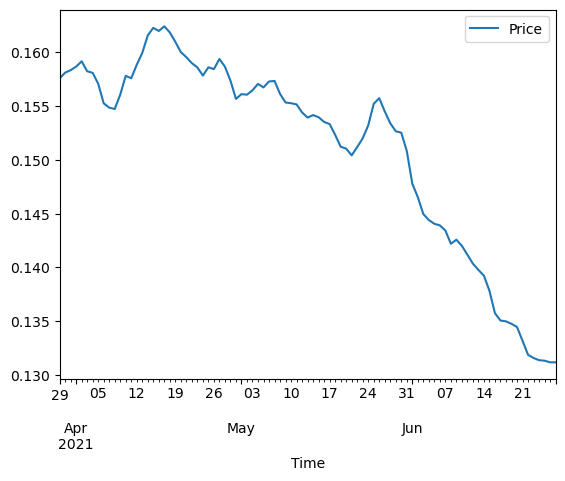

In [11]:
df.plot()
plt.show()

## Checking Stationarity

In [12]:
from pmdarima.arima import ADFTest

In [13]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest()


(0.840426646910719, True)

## Train and Test Split

In [14]:
n = int(len(df) * 0.8)

In [15]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-03-29    0.157533
2021-03-30    0.158067
2021-03-31    0.158300
2021-04-01    0.158625
2021-04-02    0.159125
                ...   
2021-06-04    0.144400
2021-06-05    0.144050
2021-06-06    0.143900
2021-06-07    0.143425
2021-06-08    0.142200
Name: Price, Length: 72, dtype: float64

For Testing
Time
2021-06-09    0.142575
2021-06-10    0.142000
2021-06-11    0.141175
2021-06-12    0.140350
2021-06-13    0.139767
2021-06-14    0.139233
2021-06-15    0.137825
2021-06-16    0.135750
2021-06-17    0.135075
2021-06-18    0.135000
2021-06-19    0.134767
2021-06-20    0.134475
2021-06-21    0.133200
2021-06-22    0.131900
2021-06-23    0.131600
2021-06-24    0.131400
2021-06-25    0.131350
2021-06-26    0.131200
2021-06-27    0.131200
Name: Price, dtype: float64


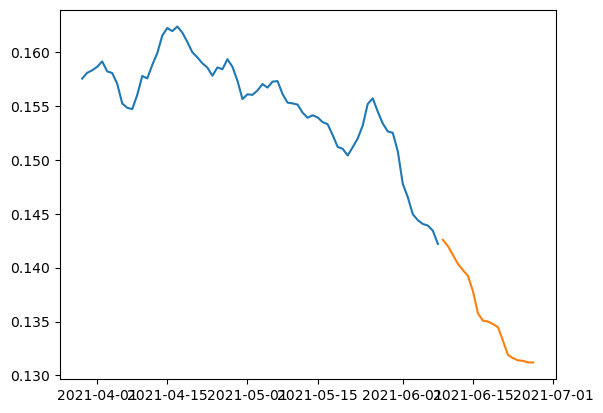

In [16]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [17]:
arima_model=auto_arima (train, start_p=3, d=1, start_q=3, max_p=3,
                        max_d=1, max_q=3, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=4, seasonal=False,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

/Users/tej/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-798.821, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-788.444, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-808.172, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-802.771, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-786.570, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-806.190, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-806.185, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-782.439, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-808.904, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-806.974, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-806.963, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-801.986, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-780.569, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.245 seconds


## Forecasting

In [18]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-09,0.141530
2021-06-10,0.141163
2021-06-11,0.140962
2021-06-12,0.140852
2021-06-13,0.140792
2021-06-14,0.140759
2021-06-15,0.140741
2021-06-16,0.140731
2021-06-17,0.140726


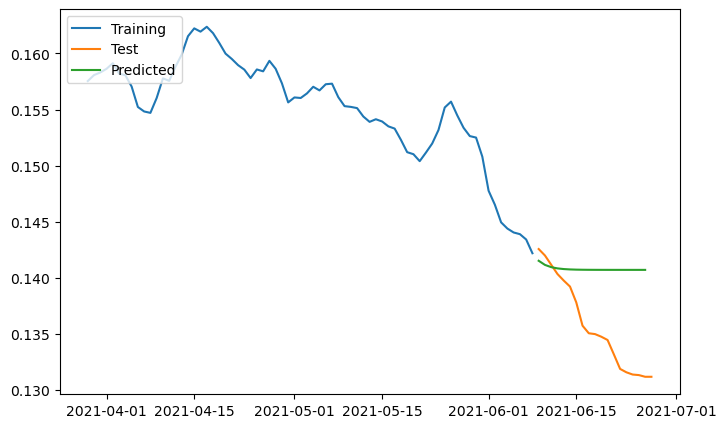

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.show()

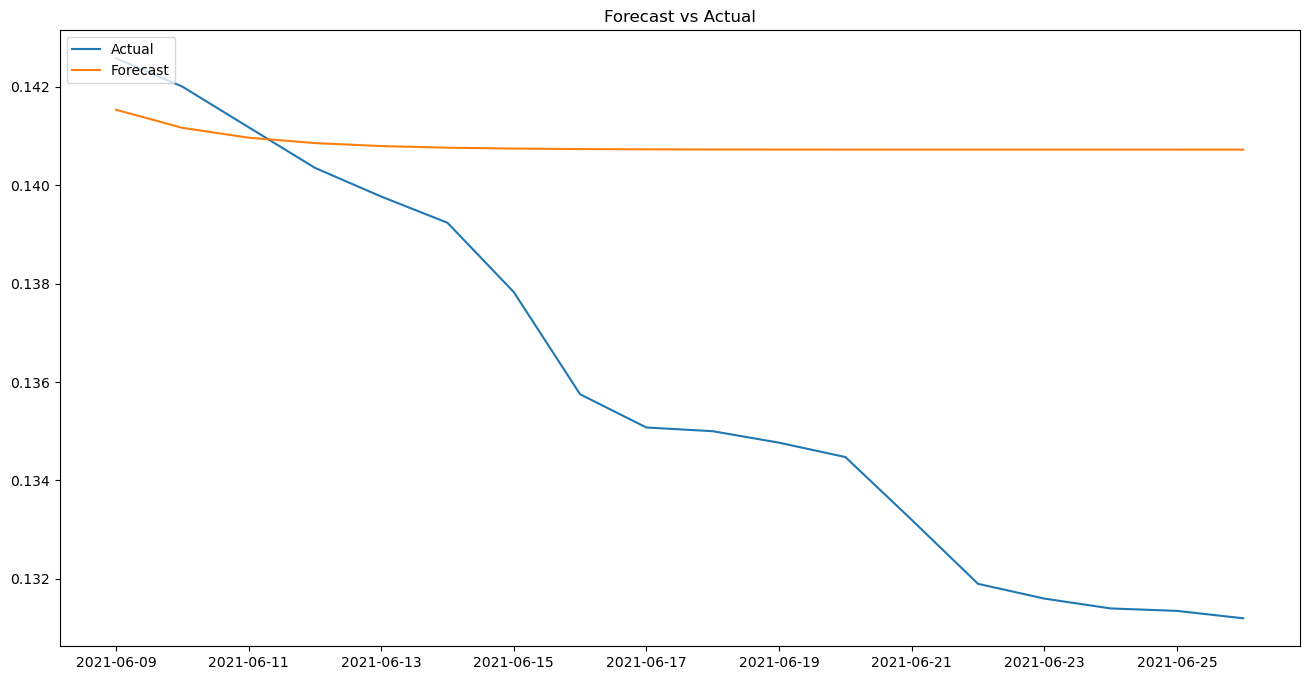

In [20]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.show()

## R2 Score

In [21]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-09,0.142575
2021-06-10,0.142000
2021-06-11,0.141175
2021-06-12,0.140350
2021-06-13,0.139767
2021-06-14,0.139233
2021-06-15,0.137825
2021-06-16,0.135750
2021-06-17,0.135075


In [22]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-09,0.142575,0.141530
2021-06-10,0.142000,0.141163
2021-06-11,0.141175,0.140962
2021-06-12,0.140350,0.140852
2021-06-13,0.139767,0.140792
2021-06-14,0.139233,0.140759
2021-06-15,0.137825,0.140741
2021-06-16,0.135750,0.140731
2021-06-17,0.135075,0.140726


In [23]:
r2_score(test_df['Price'], test_df['predicted_prices'])

-1.4606597498701999

In [24]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.0060582386386846794

In [25]:
test_df.predicted_prices.describe()

count    18.000000
mean      0.140819
std       0.000211
min       0.140719
25%       0.140719
50%       0.140724
75%       0.140784
max       0.141530
Name: predicted_prices, dtype: float64

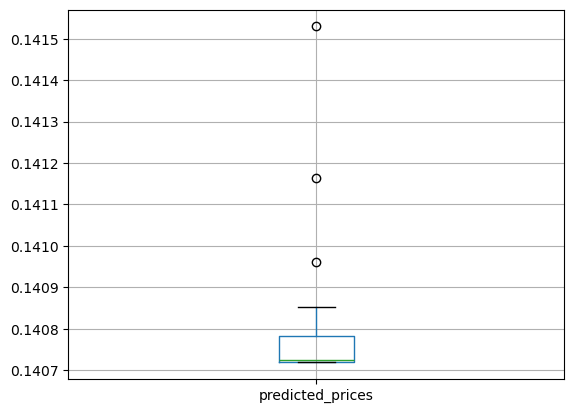

In [26]:
test_df.boxplot(column=['predicted_prices'])
plt.show()